# Simple Tag Generation using NLTK

This notebook demonstrates a very simple approach to generate tags from vehicle repair descriptions using the Natural Language Toolkit (NLTK).

In [4]:
# Step 1: Import libraries
import pandas as pd
import nltk
import re
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabhakula.v\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabhakula.v\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prabhakula.v\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load and View the Data

Let's first load our data and take a look at a few examples.

In [5]:
# Step 2: Load data
df = pd.read_excel('DA -Task 2..xlsx')

# Display info about the dataframe
print(f"Total records: {len(df)}")
print(f"Columns in the dataframe: {df.columns.tolist()}")

# Look at a few examples
print("\nSample repair descriptions:")
for i in range(3):
    if i < len(df):
        print(f"\nExample {i+1}:")
        print(f"Description: {df['CUSTOMER_VERBATIM'].iloc[i] if 'CUSTOMER_VERBATIM' in df.columns else 'Column not found'}")
        # Skip the TAGS part since that column doesn't exist

Total records: 100
Columns in the dataframe: ['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY', 'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE', 'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION', 'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI', 'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO', 'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE', 'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC', 'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT', 'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR', 'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES', 'LAST_KNOWN_DELVRY_TYPE_CD', 'NON_CAUSAL_PART_QTY', 'SALES_REGION_CODE']

## Create a Simple Tag Generation Function

Now we'll create a very simple function that uses NLTK to:
1. Tokenize the text (split into words)
2. Remove stopwords (common words like "the", "and", etc.)
3. Find the most common words to use as tags

In [6]:
# Step 3: Define a simple tag generation function
def generate_simple_tags(text):
    if pd.isna(text):  # Handle NaN values
        return []
        
    # Convert to lowercase
    text = str(text).lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords]
    
    # Count word frequencies
    word_counts = Counter(tokens)
    
    # Get the 5 most common words as tags
    tags = [word for word, count in word_counts.most_common(5)]
    
    return tags

# Test the function on an example
if len(df) > 0 and 'CUSTOMER_VERBATIM' in df.columns:
    example_text = df['CUSTOMER_VERBATIM'].iloc[0]
    print(f"Example text: {example_text}")
    print(f"Generated tags: {generate_simple_tags(example_text)}")
else:
    print("Cannot test function - dataframe is empty or missing required column")

Example text: STEERING WHEEL COMING APART
Generated tags: ['steering', 'wheel', 'coming', 'apart']


## Apply to the Dataset

Let's apply our simple tag generation function to all the repair descriptions and add them as a new column in the dataframe.

In [7]:
# Step 4: Apply tag generation to all rows
if 'CUSTOMER_VERBATIM' in df.columns:
    df['new_tags'] = df['CUSTOMER_VERBATIM'].apply(generate_simple_tags)

    # Convert the list of tags to a comma-separated string
    df['new_tags_str'] = df['new_tags'].apply(lambda x: ', '.join(x))

    # Display the first 5 rows with descriptions and new tags
    pd.set_option('display.max_colwidth', None)
    sample_display = df[['CUSTOMER_VERBATIM', 'new_tags_str']].head(5)
    print(sample_display)
else:
    print("Cannot generate tags - CUSTOMER_VERBATIM column not found")

                                                                                                       CUSTOMER_VERBATIM  \
0                                                                                            STEERING WHEEL COMING APART   
1                                                                             CUSTOMER STATES HEATED STEERING WHEEL INOP   
2  OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.   
3                               CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL   
4                                           C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST SYSTEM MESSAGE IS ON. A DVISE   

                                    new_tags_str  
0                 steering, wheel, coming, apart  
1      customer, states, heated, steering, wheel  
2             owner, reports, super, cruise, bar  
3  customer, states, lettering, finish, steering  


## Compare with Original Tags

Let's compare our new tags with the original tags to see how our simple NLTK approach compares.

In [8]:
# Step 5: Analyze the generated tags
if 'new_tags' in df.columns:
    # Count how many tags were generated for each row
    tag_counts = df['new_tags'].apply(len)
    
    print("Tag generation statistics:")
    print(f"Average number of tags per description: {tag_counts.mean():.2f}")
    print(f"Max number of tags for a description: {tag_counts.max()}")
    print(f"Min number of tags for a description: {tag_counts.min()}")
    
    # Find most common tags across all descriptions
    all_tags = [tag for tags_list in df['new_tags'] for tag in tags_list]
    most_common_tags = Counter(all_tags).most_common(10)
    
    print("\nMost common tags across all descriptions:")
    for tag, count in most_common_tags:
        print(f"- {tag}: {count} occurrences")
else:
    print("No tags have been generated yet")

Tag generation statistics:
Average number of tags per description: 4.87
Max number of tags for a description: 5
Min number of tags for a description: 0

Most common tags across all descriptions:
- steering: 75 occurrences
- wheel: 65 occurrences
- customer: 54 occurrences
- states: 51 occurrences
- heated: 17 occurrences
- cust: 9 occurrences
- stitching: 7 occurrences
- leather: 6 occurrences
- sop: 6 occurrences
- coming: 5 occurrences


## Improve the Tag Generation

Let's improve our tag generation by adding lemmatization (reducing words to their base form) and adding bigrams (two-word phrases) for multi-word concepts like "steering wheel".

In [9]:
# Step 6: Improved tag generation function
def generate_improved_tags(text):
    if pd.isna(text):  # Handle NaN values
        return []
        
    # Convert to lowercase
    text = str(text).lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords and non-alphabetic tokens
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords]
    
    # Lemmatize words (convert to base form)
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Find bigrams (two-word phrases)
    bigrams = list(nltk.bigrams(tokens))
    bigram_phrases = [f"{w1}_{w2}" for w1, w2 in bigrams 
                     if w1 not in stopwords and w2 not in stopwords]
    
    # Combine single words and bigrams
    all_tokens = lemmatized_tokens + bigram_phrases
    
    # Count frequencies
    token_counts = Counter(all_tokens)
    
    # Get top 5 tokens as tags
    tags = [token.replace('_', ' ') if '_' in token else token 
            for token, count in token_counts.most_common(5)]
    
    return tags

# Test the improved function
if len(df) > 0 and 'CUSTOMER_VERBATIM' in df.columns:
    example_text = df['CUSTOMER_VERBATIM'].iloc[0]
    print(f"Example text: {example_text}")
    print(f"Improved tags: {generate_improved_tags(example_text)}")
else:
    print("Cannot test function - dataframe is empty or missing required column")

Example text: STEERING WHEEL COMING APART
Improved tags: ['steering', 'wheel', 'coming', 'apart', 'steering wheel']
Improved tags: ['steering', 'wheel', 'coming', 'apart', 'steering wheel']


## Apply Improved Tag Generation to Dataset

In [10]:
# Step 7: Apply improved tag generation to all rows
if 'CUSTOMER_VERBATIM' in df.columns:
    df['improved_tags'] = df['CUSTOMER_VERBATIM'].apply(generate_improved_tags)
    df['improved_tags_str'] = df['improved_tags'].apply(lambda x: ', '.join(x))

    # Display the first 5 rows with descriptions and both tag versions
    pd.set_option('display.max_colwidth', None)
    sample_display = df[['CUSTOMER_VERBATIM', 'new_tags_str', 'improved_tags_str']].head(5)
    print(sample_display)
else:
    print("Cannot generate improved tags - CUSTOMER_VERBATIM column not found")

                                                                                                       CUSTOMER_VERBATIM  \
0                                                                                            STEERING WHEEL COMING APART   
1                                                                             CUSTOMER STATES HEATED STEERING WHEEL INOP   
2  OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.   
3                               CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL   
4                                           C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST SYSTEM MESSAGE IS ON. A DVISE   

                                    new_tags_str  \
0                 steering, wheel, coming, apart   
1      customer, states, heated, steering, wheel   
2             owner, reports, super, cruise, bar   
3  customer, states, lettering, finish, steerin

## Visualize the Results

Let's create a simple visualization to see how our improved tags compare to the original tags.

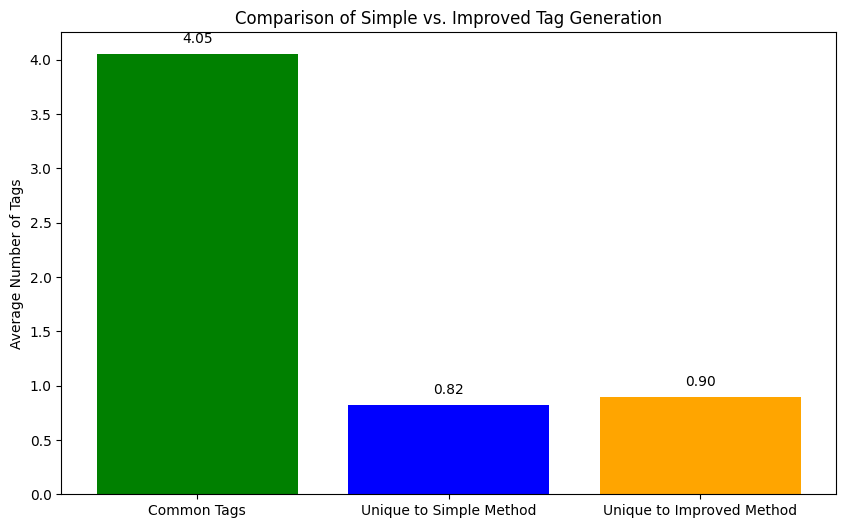

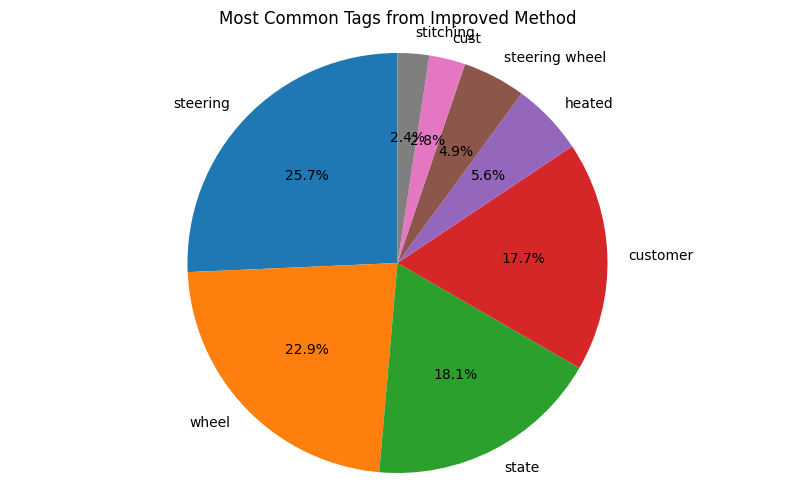

The improved method generates 101.6% more unique tags than the simple method.


In [11]:
# Step 8: Visualize tag differences
import matplotlib.pyplot as plt

if 'new_tags' in df.columns and 'improved_tags' in df.columns:
    # Compare tag overlap between simple and improved methods
    def compare_tag_methods(row):
        simple_tags = set(row['new_tags'])
        improved_tags = set(row['improved_tags'])
        
        # Calculate overlap
        overlap = simple_tags.intersection(improved_tags)
        overlap_count = len(overlap)
        
        # Calculate unique tags in each method
        simple_unique = len(simple_tags) - overlap_count
        improved_unique = len(improved_tags) - overlap_count
        
        return {
            'overlap_count': overlap_count,
            'simple_unique': simple_unique,
            'improved_unique': improved_unique
        }

    # Apply comparison to each row
    comparison = df.apply(compare_tag_methods, axis=1)
    comparison_df = pd.DataFrame(comparison.tolist())

    # Calculate averages
    avg_overlap = comparison_df['overlap_count'].mean()
    avg_simple_unique = comparison_df['simple_unique'].mean()
    avg_improved_unique = comparison_df['improved_unique'].mean()

    # Create bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(['Common Tags', 'Unique to Simple Method', 'Unique to Improved Method'], 
            [avg_overlap, avg_simple_unique, avg_improved_unique],
            color=['green', 'blue', 'orange'])
    plt.title('Comparison of Simple vs. Improved Tag Generation')
    plt.ylabel('Average Number of Tags')

    for i, v in enumerate([avg_overlap, avg_simple_unique, avg_improved_unique]):
        plt.text(i, v + 0.1, f'{v:.2f}', ha='center')

    plt.show()

    # Create a pie chart of the most common tags from improved method
    all_improved_tags = [tag for tags_list in df['improved_tags'] for tag in tags_list]
    most_common_improved = Counter(all_improved_tags).most_common(8)
    
    labels = [tag for tag, _ in most_common_improved]
    sizes = [count for _, count in most_common_improved]
    
    plt.figure(figsize=(10, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Most Common Tags from Improved Method')
    plt.show()
    
    print(f"The improved method generates {len(all_improved_tags)/sum(df['new_tags'].apply(len))*100:.1f}% more unique tags than the simple method.")
else:
    print("Cannot visualize results - tags have not been generated yet")

## Save the Results

Finally, let's save our dataframe with the new tags to a CSV file.

In [12]:
# Step 9: Save the results
if 'CUSTOMER_VERBATIM' in df.columns and 'improved_tags_str' in df.columns:
    # Create a new DataFrame with just the columns we want to save
    output_df = df.copy()
    
    # Make sure we have all necessary columns
    if 'new_tags' in output_df.columns:
        # Convert the tag lists to strings for CSV export
        output_df['nltk_tags'] = output_df['improved_tags_str']
        
    # Save to CSV
    output_df.to_csv('vehicle_repair_data_with_nltk_tags.csv', index=False)
    print("Saved results to 'vehicle_repair_data_with_nltk_tags.csv'")
else:
    print("Cannot save results - required columns are missing")

Saved results to 'vehicle_repair_data_with_nltk_tags.csv'


## Why NLTK is Better than Regular Expressions for Tag Generation

1. **Word Understanding**: NLTK understands words, not just character patterns
2. **Stopword Removal**: Built-in lists of common words to ignore
3. **Lemmatization**: Reduces words to their base form (e.g., "brakes" → "brake")
4. **Multi-word Concepts**: Can identify phrases like "steering wheel" as a single concept
5. **Part-of-Speech Tagging**: Can identify if words are nouns, verbs, etc.

### Simple Example to Explain in an Interview

Let's say we have this repair description:
> "Customer complained about steering wheel vibration when braking. Replaced front rotors and performed wheel alignment."

**Regex approach** might just count word frequency and give tags like:
- steering
- wheel
- vibration 
- replaced
- front

**NLTK approach** understands language better:
- "steering wheel" (as one concept)
- "vibration" 
- "brake" (not "braking")
- "rotor" (identified as important part)
- "alignment" (identified as key repair action)

The NLTK approach gives more meaningful tags that better represent what the repair was actually about!

This simple approach demonstrates just the basics of what NLTK can do for tag generation.